In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

city = pd.read_csv("city_data.csv")
ride = pd.read_csv("ride_data.csv")
data = pd.merge(city, ride, on='city', how='outer')

city.head()

,city,driver_count,type
0,Tammyburgh,11,Urban
1,Melissaborough,15,Urban
2,Port Brianborough,62,Urban
3,New Katherine,68,Urban
4,Lake Charlesside,65,Urban


In [151]:
# Total Number of Rides Per City 
#rides_per_city = data.groupby(['type'])['city'].count()
rides_per_city_urban = data[data['type'] == 'Urban'].groupby(['type','city'])['city'].count()
rides_per_city_sub = data[data['type'] == 'Suburban'].groupby(['type','city'])['city'].count()
rides_per_city_rural = data[data['type'] == 'Rural'].groupby(['type','city'])['city'].count()


# Average Fare ($) Per City 
#average_fare_per_city = data.groupby(['type','city'])['fare'].mean()
average_fare_per_city_urban = data[data['type'] == 'Urban'].groupby(['type','city'])['fare'].mean()
average_fare_per_city_sub = data[data['type'] == 'Suburban'].groupby(['type','city'])['fare'].mean()
average_fare_per_city_rural = data[data['type'] == 'Rural'].groupby(['type','city'])['fare'].mean()

# Total Number of Drivers Per City 
#drivers_per_city = city.groupby(['type', 'city'])['driver_count'].sum()
drivers_per_city_urban = city[city['type'] == 'Urban'].groupby(['type', 'city'])['driver_count'].sum()
drivers_per_city_sub = city[city['type'] == 'Suburban'].groupby(['type', 'city'])['driver_count'].sum()
drivers_per_city_rural = city[city['type'] == 'Rural'].groupby(['type', 'city'])['driver_count'].sum()


# City Type (Urban, Suburban, Rural)
city_type = data.groupby(['type', 'city']).nunique()

rides_per_city_rural.head()

type   city            
Rural  Campbellmouth        8
       Davidsonfurt         2
       Hoganfort           11
       Joshuaview          11
       Lake Joshuaburgh     7
Name: city, dtype: int64

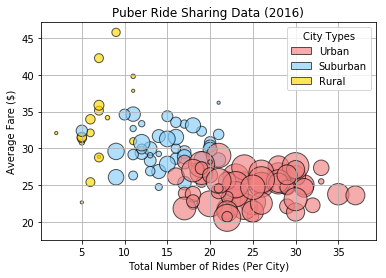

In [170]:
# SCATTER PLOT

plt.scatter(
    rides_per_city_rural, 
    average_fare_per_city_rural, 
    s = drivers_per_city_rural*10, 
    c = 'gold', 
    alpha = 0.65,
    edgecolors='black'
)

plt.scatter(
    rides_per_city_sub, 
    average_fare_per_city_sub, 
    s = drivers_per_city_sub*10, 
    c = 'lightskyblue', 
    alpha = 0.65,
    edgecolors='black'
)

plt.scatter(
    rides_per_city_urban, 
    average_fare_per_city_urban, 
    s = drivers_per_city_urban*10, 
    c = 'lightcoral', 
    alpha = 0.65,
    edgecolors='black'
)

plt.title("Puber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")



urban_legend = mpatches.Circle((0, 0),
    label='Urban',
    facecolor='lightcoral',  
    edgecolor = 'black',
    alpha = 0.65
)

sub_legend = mpatches.Circle((0, 0),
    label='Suburban',
    facecolor='lightskyblue', 
    edgecolor = 'black',
    alpha = 0.65
)

rural_legend = mpatches.Circle((0, 1),
    label='Rural',
    facecolor='gold', 
    edgecolor = 'black',
    alpha = 0.65
)
plt.legend(handles=[urban_legend, sub_legend, rural_legend], title='City Types', fancybox=True)
plt.grid()
plt.show()

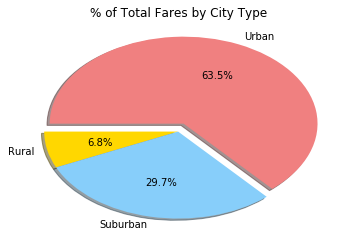

In [153]:
# % of Total Fares by City Type (pie chart)
fares_per_city_type = data.groupby(['type'])['fare'].sum()
fares_per_city_type

labels = ['Rural', 'Suburban', 'Urban']
explode = (0, 0, 0.1)
colors =  ['gold', 'lightskyblue', 'lightcoral']

plt.pie(
    fares_per_city_type, 
    explode = explode, 
    labels = labels, 
    autopct = '%1.1f%%',
    shadow = True, 
    startangle = 180,
    colors = colors)

plt.title("% of Total Fares by City Type")

plt.show()

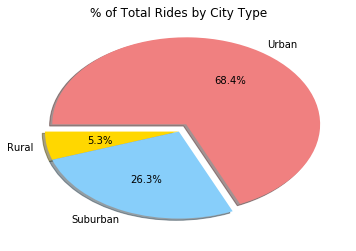

In [154]:
# % of Total Rides by City Type (pie chart)
rides_per_city_type = data.groupby(['type'])['date'].count()
rides_per_city_type

labels = ['Rural', 'Suburban', 'Urban']
explode = (0, 0, 0.1)
colors =  ['gold', 'lightskyblue', 'lightcoral']

plt.pie(
    rides_per_city_type, 
    explode = explode, 
    labels = labels, 
    autopct = '%1.1f%%',
    shadow = True, 
    startangle = 180,
    colors = colors)

plt.title("% of Total Rides by City Type")

plt.show()

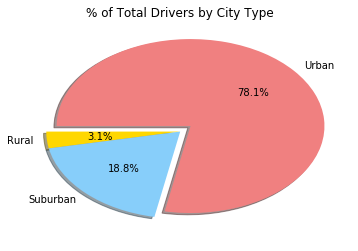

In [156]:
# % of Total Drivers by City Type (pie chart)

drivers_per_city_type = city.groupby(['type'])['driver_count'].sum()
drivers_per_city_type

labels = ['Rural', 'Suburban', 'Urban']
explode = (0, 0, 0.1)
colors =  ['gold', 'lightskyblue', 'lightcoral']

plt.pie(
    drivers_per_city_type, 
    explode = explode, 
    labels = labels, 
    autopct = '%1.1f%%',
    shadow = True, 
    startangle = 180,
    colors = colors)

plt.title("% of Total Drivers by City Type")

plt.show()